In [1]:
import numpy as np
import math
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
N=50
x_start, x_end = -2.0, 2.0
y_start, y_end = -1.0, 1.0
x = np.linspace(x_start,x_end,N)
y = np.linspace(y_start,y_end,N)
X,Y = np.meshgrid(x,y)

In [3]:
kappa = 1.0 ## strength of the doublet
x_doublet, y_doublet = 0.25, 0.0

In [4]:
def get_velocity(strength,xd,yd,X,Y):
    u = (- strength / (2 * math.pi) *
         ((X - xd)**2 - (Y - yd)**2) /
         ((X - xd)**2 + (Y - yd)**2)**2)
    v = (- strength / (2 * math.pi) *
         2 * (X - xd) * (Y - yd) /
         ((X - xd)**2 + (Y - yd)**2)**2)
    return u, v

def get_stream_function_doublet(strength, xd, yd, X, Y):
    psi = - strength / (2 * math.pi) * (Y - yd) / ((X - xd)**2 + (Y - yd)**2)
    return psi

In [5]:
def plot_fig(width):
    height = (y_end - y_start) / (x_end - x_start) * width
    fig = plt.figure(figsize=(width, height))
    plt.xlabel('x', fontsize=16)
    plt.ylabel('y', fontsize=16)
    plt.xlim(x_start, x_end)
    plt.ylim(y_start, y_end)
    return fig
    

In [6]:
## compute the u v values of the doublet
u_doublet, v_doublet = get_velocity(kappa,x_doublet,y_doublet,X,Y)

## compute the stream function of the doublet

psi_doublet = get_stream_function_doublet(kappa,x_doublet,y_doublet,X,Y)

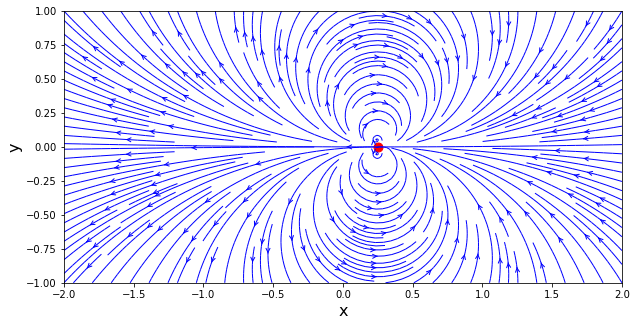

In [7]:
fig=plot_fig(10)
plt.streamplot(X,Y,u_doublet,v_doublet,
              density=2, linewidth=1, arrowsize=1, arrowstyle='->',
              color = 'b');
plt.scatter(x_doublet,y_doublet, color='r',s=80, marker='o');

In [8]:
## UNIFORMS FLOW PAST A DOUBLET
u_inf = 1.0    #freestream speed

In [9]:
u_freestream = u_inf * np.ones((N, N), dtype=float)
v_freestream = np.zeros((N, N), dtype=float)

psi_freestream = u_inf * Y

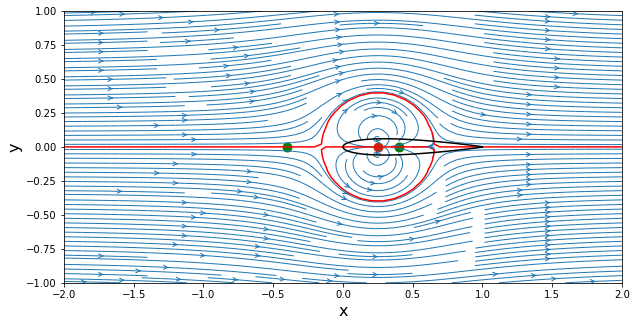

In [10]:
u = u_freestream + u_doublet
v = v_freestream + v_doublet
psi = psi_freestream + psi_doublet

fig=plot_fig(10)
plt.streamplot(X,Y,u,v,
              density=2,linewidth=1,arrowsize=1,arrowstyle='->');
plt.contour(X,Y,psi,colors='r',levels=[0.],linestyles='solid');
plt.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o');
# calculate the stagnation points
x_stagn1, y_stagn1 = +math.sqrt(kappa / (2 * math.pi * u_inf)), 0.0
x_stagn2, y_stagn2 = -math.sqrt(kappa / (2 * math.pi * u_inf)), 0.0

# display the stagnation points
plt.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2],
               color='g', s=80, marker='o');
A_x = np.loadtxt('/home/juan/Documents/Aerodynamics_Course_GW/AeroPython/lessons/resources/NACA0012_x.txt')
A_y = np.loadtxt('/home/juan/Documents/Aerodynamics_Course_GW/AeroPython/lessons/resources/NACA0012_y.txt')
plt.plot(A_x,A_y,color='black');

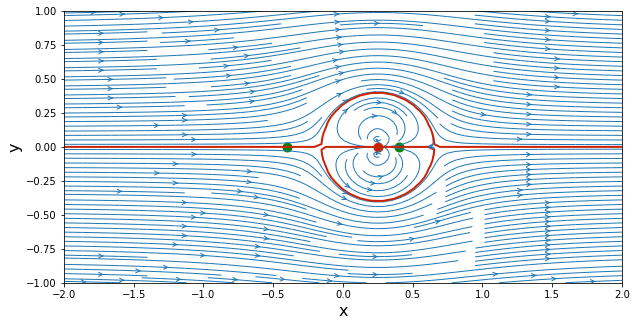

In [11]:
# superposition of the doublet on the freestream flow
u = u_freestream + u_doublet
v = v_freestream + v_doublet
psi = psi_freestream + psi_doublet

# plot the streamlines
width = 10
height = (y_end - y_start) / (x_end - x_start) * width
plt.figure(figsize=(width, height))
plt.xlabel('x', fontsize=16)
plt.ylabel('y', fontsize=16)
plt.xlim(x_start, x_end)
plt.ylim(y_start, y_end)
plt.streamplot(X, Y, u, v,
                  density=2, linewidth=1, arrowsize=1, arrowstyle='->')
plt.contour(X, Y, psi,
               levels=[0.], colors='#CD2305', linewidths=2, linestyles='solid')
plt.scatter(x_doublet, y_doublet, color='#CD2305', s=80, marker='o')

# calculate the stagnation points
x_stagn1, y_stagn1 = +math.sqrt(kappa / (2 * math.pi * u_inf)), 0.0
x_stagn2, y_stagn2 = -math.sqrt(kappa / (2 * math.pi * u_inf)), 0.0

# display the stagnation points
plt.scatter([x_stagn1, x_stagn2], [y_stagn1, y_stagn2],
               color='g', s=80, marker='o');

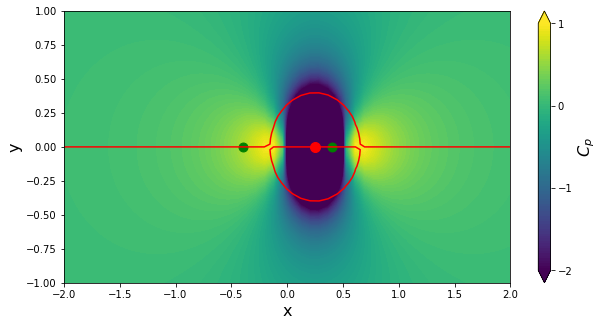

In [12]:
cp = 1.0 - (u**2 + v**2) / u_inf**2

fig_cp = plot_fig(10)
contf = plt.contourf(X,Y,cp,
                    levels=np.linspace(-2.0,1.0,100),extend='both')
cbar = plt.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
plt.contour(X,Y,psi,levels = [0.],colors='r',linestyles='solid');
plt.scatter([x_stagn1,x_stagn2],[y_stagn1,y_stagn2],color='g',
           s=80,marker='o');
plt.scatter(x_doublet,y_doublet,color='r',s=100,marker='o');